<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

In [8]:
data_filename = "Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv"
wd = os.getcwd()
data = os.path.join(wd, "..", "module1-text-data", "data", data_filename)
reviews = pd.read_csv(data)
corpus = reviews['reviews.text']

In [25]:
STOPWORDS = set(STOPWORDS).union(set(["batteries", "i", "amazon"]))

def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [32]:
tokens = [tokenize(string) for string in corpus]
len(tokens)

28332

In [37]:
id2word = corpora.Dictionary(tokens)

In [44]:
id2word.token2id['hate']

659

In [47]:
id2word.filter_extremes(no_below=5, no_above=.80)

In [48]:
len(id2word.keys())

3579

In [49]:
crps = [id2word.doc2bow(text) for text in tokens]
crps[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1)]

In [50]:
lda = LdaMulticore(corpus=crps,
                   id2word=id2word,
                   random_state=42,
                   num_topics=15,
                   passes=10,
                   workers=4
                  )

In [51]:
lda.print_topics()

[(0,
  '0.050*"kindle" + 0.034*"best" + 0.025*"buy" + 0.022*"love" + 0.022*"bought" + 0.016*"like" + 0.016*"black" + 0.013*"got" + 0.013*"new" + 0.012*"friday"'),
 (1,
  '0.070*"books" + 0.066*"read" + 0.042*"easy" + 0.042*"reading" + 0.037*"use" + 0.030*"kindle" + 0.029*"light" + 0.025*"reader" + 0.018*"apps" + 0.017*"size"'),
 (2,
  '0.072*"great" + 0.066*"kids" + 0.061*"product" + 0.056*"easy" + 0.051*"love" + 0.043*"use" + 0.035*"recommend" + 0.029*"tablet" + 0.016*"nice" + 0.013*"set"'),
 (3,
  '0.089*"loves" + 0.084*"old" + 0.064*"year" + 0.057*"bought" + 0.037*"tablet" + 0.029*"daughter" + 0.026*"christmas" + 0.026*"son" + 0.024*"gift" + 0.020*"easy"'),
 (4,
  '0.060*"long" + 0.037*"brand" + 0.036*"buy" + 0.033*"price" + 0.026*"work" + 0.023*"great" + 0.023*"brands" + 0.017*"time" + 0.011*"like" + 0.011*"battery"'),
 (5,
  '0.064*"ipad" + 0.032*"excellent" + 0.024*"tablet" + 0.020*"cover" + 0.018*"screen" + 0.012*"use" + 0.012*"quickly" + 0.011*"kindle" + 0.011*"mother" + 0.011*

In [ ]:
words = [re.findall('"([^"]*)"', t[1]) for t in lda.print_topics()]
words

### Topic Distance Visualization

In [55]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [56]:
pyLDAvis.gensim.prepare(lda, crps, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10    -0.188604  0.011048       1        1  10.984775
13     0.196410 -0.149683       2        1  10.256095
4      0.252638 -0.010334       3        1  10.033137
3     -0.207149  0.017080       4        1   8.014722
8     -0.097059  0.027223       5        1   7.169876
2     -0.126969  0.179891       6        1   6.999555
0     -0.010319 -0.094382       7        1   6.969095
14     0.100840 -0.157827       8        1   6.103758
11     0.109662  0.291109       9        1   5.705850
1     -0.151719 -0.070117      10        1   5.460548
9     -0.043384 -0.142114      11        1   5.153737
7      0.227803  0.158998      12        1   4.930240
6     -0.067588  0.067214      13        1   4.407376
12     0.038713 -0.091835      14        1   3.906437
5     -0.033275 -0.036270      15        1   3.904810, topic_info=           Term         Freq        Total Category  logprob  loglift
32         good  5613.000000  5613.000000  Default  30.0000  30.0000
20        great  8957.000000  8957.000000  Default  29.0000  29.0000
17        price  4909.000000  4909.000000  Default  28.0000  28.0000
2430     tablet  7125.000000  7125.000000  Default  27.0000  27.0000
1855      loves  2177.000000  2177.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
126   purchased    85.988945  1379.871338  Topic15  -4.8991   0.4674
883        gift    68.399239  1103.407104  Topic15  -5.1280   0.4622
242        fast    65.196129   683.219055  Topic15  -5.1759   0.8935
17        price    69.329926  4909.298828  Topic15  -5.1145  -1.0170
753        easy    65.828278  3001.804443  Topic15  -5.1663  -0.5770

[1134 rows x 6 columns], token_table=      Topic      Freq Term
term                      
54        2  0.638802   aa
54        3  0.357817   aa
54        8  0.002195   aa
55        2  0.743517  aaa
55        3  0.243966  aaa
...     ...       ...  ...
1234      5  0.083695  yrs
3010     10  0.990727  äôs
2982      5  0.024110  äôt
2982      7  0.819735  äôt
2982     15  0.132604  äôt

[3682 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 14, 5, 4, 9, 3, 1, 15, 12, 2, 10, 8, 7, 13, 6])

### Select Number of Topics

In [68]:
from gensim.models.coherencemodel import CoherenceModel
import logging

logging.basicConfig(level=logging.DEBUG, format="%(message)")

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
            coherencemodel = CoherenceModel(model=model, dictionary=dictionary, corpus=corpus, coherence="u_mass")
            coherence_values.append({"pass": iter_,
                                     "num_topics": num_topics,
                                     "coherence_score": coherencemodel.get_coherence()
                                    })
    return coherence_values
        

In [69]:
coherence_values = compute_coherence_values(dictionary=id2word,
                                                       corpus=crps,
                                                       start=5,
                                                       limit=40,
                                                       step=2,
                                                       passes=10)

In [70]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

In [71]:
topic_coherence

,pass,num_topics,coherence_score
0,0,5,-2.560651
1,0,7,-2.610752
2,0,9,-2.628496
3,0,11,-2.668790
4,0,13,-2.819495
...,...,...,...
175,9,31,-2.957749
176,9,33,-2.835235
177,9,35,-2.953309
178,9,37,-3.104154


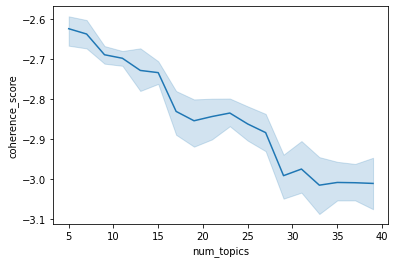

In [72]:
import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

### A Few Interpretations of Topics

* many of the topics appear to be about tablets, despite the fact that I didn't subset this way
* there seems to be a lot of buying tablets for daughters
* topic 0 (or 1) seems to be about buying kindles around black friday

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling